Looking at graduate student and postdoctoral scholar trends in sex diversity.

In [1]:
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt

In [2]:
GRAD_TOTALS = pickle.load(open('../data/Sex_Graduates.p', 'rb'))
POST_TOTALS = pickle.load(open('../data/Sex_Postdoctorates.p', 'rb'))

years = sorted(GRAD_TOTALS.keys())
institutions = sorted(GRAD_TOTALS[ max(years) ].keys())

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [3]:
def get_proportions(totals, inst):
    props = []
    for year in years:
        inst_data = totals[year][inst]
        props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_proportions(totals, title, highlight='Columbia University in the City of New York'):
    plt.figure(figsize=(8, 8))

    for inst in institutions:
        if inst != highlight:
            plt.plot(years, get_proportions(totals, inst), label=inst)
    plt.plot(years, get_proportions(totals, highlight), label=highlight, color='black', linewidth=3)
    
    plt.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    plt.ylim(bottom=0, top=0.6)
    
    plt.ylabel('Proportion female')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.grid()

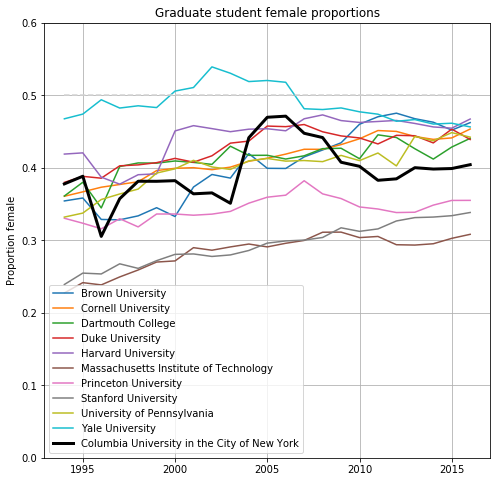

In [4]:
plot_proportions(GRAD_TOTALS, 'Graduate student female proportions')

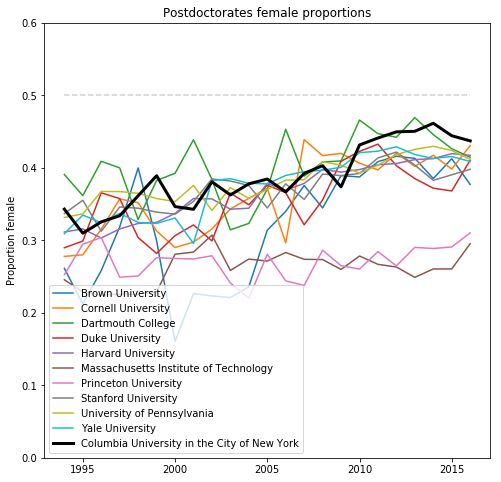

In [5]:
plot_proportions(POST_TOTALS, 'Postdoctorates female proportions')